# SLU13 - Linear Algebra & NumPy, Part 2: Exercise notebook

In this notebook the following is tested:

- Matrix multiplication;
- The inverse;
- Additional NumPy methods.

In [1]:
# run this cell before anything else

# numpy package - your new friend!
import numpy as np

# auxiliary stuff
import os
from utils import *

# for evaluation purposes
import inspect
import hashlib
import numbers
from math import isclose
def _hash(s):
    return hashlib.blake2b(
        bytes(str(s), encoding='utf8'),
        digest_size=5
    ).hexdigest()

## 1 - Matrix multiplication

### Exercise 1.1 (2 points)

What is the value of the element in the entry $c_{3,4}$ (row 3, column 4)?

$$\mathbf{C} = \begin{bmatrix}
    4 & 3 & 1\\
    -5 & 1 & -5\\
    0 & 1 & -1\\
    2 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
    4 & 3 & 1 & 2\\
    -5 & -5 & -5 & -1\\
    0 & 0 & 0 & 2\\
\end{bmatrix}
$$

Notice that **you don't need to calculate all the elements** of the resulting matrix, **only the entry $c_{3,4}$**!!

**Do not use any auxiliary code to compute this.** All you need is what you learned about matrix multiplication in the learning notebook.

In [3]:
# Assign the value directly to c_34
c_34 = -3



In [4]:
assert isinstance(c_34, numbers.Number), "c_34 should be a number!"
assert _hash(int(c_34)) == '57c24e4418', "That's not correct! :("

### Exercise 1.2 (2 points)

Write the second column vector of matrix $\mathbf{D}$ as a **2D numpy array of shape `(3, 1)`**:

$$\mathbf{D} = \begin{bmatrix}
    1 & 3 & 1\\
    1 & 1 & 0\\
    0 & 1 & -1\\
\end{bmatrix}
\begin{bmatrix}
    -2 & 1 & 0\\
    1 & 0 & -2\\
    0 & 1 & 1\\
\end{bmatrix}
$$

Notice that **you don't need to calculate all the columns** of the resulting matrix, only the second one!!

Don't use auxiliary code. Try to solve this by hand using what you learned about matrix multiplication.

In [5]:
# Write the second column of D as a 2D ndarray with shape (3, 1)
column_2 = np.array([[2], [1], [-1]])

In [6]:
assert isinstance(column_2, np.ndarray), "Read the instructions carefully! column_2 should be a numpy array!"
assert _hash(column_2.ndim) == 'cf2d85ea1d', "column_2 should be a 2D numpy array!"
assert _hash(column_2.shape) == '13deaba4a9', "The shape is wrong. column_2 should by a 2D array of shape (3, 1)!"
column_2 = column_2.astype(int)
assert _hash(column_2[0]) == '9d89fe38ba' and _hash(column_2[1]) == 'b9e762f987' \
    and _hash(column_2[2]) == '8064be0e5f', "Something's wrong. Check your calculations again!"

### Exercise 1.3 (1.5 points)

Create a function to compute the product between two matrices (2D Numpy arrays) **without using** `numpy.matmul()` **nor** `numpy.dot()`!

The function should:
- be called `multiply_matrices`;
- take two 2D ndarrays (matrices) as arguments (you may assume the matrices will always be of compatible sizes);
- iterate through the arrays to perform matrix multiplication;
- return the result of the multiplication as a 2D ndarray.

**Tips**:
- you **can** use other NumPy methods such as `numpy.sum()`, just don't use `numpy.matmul()` nor `numpy.dot()`;
- you can always use prints inside a function to check what it's doing while working on a solution.

In [7]:
# create function called multiply_matrices

def multiply_matrices(mat_1, mat_2):
   
    mat_out = np.zeros(shape=(mat_1.shape[0], mat_2.shape[1]))
   
    for row in range(0, mat_out.shape[0]):  # iterate each row in matrix_1
        for col in range(0, mat_out.shape[1]):  # iterate each column in matrix_2
            mat_out[row, col] = np.sum(mat_1[row, :] * mat_2[:, col])
    return mat_out

In [8]:
# don't cheat...
source = inspect.getsource(multiply_matrices)
assert ".dot(" not in source, "Do not use numpy.dot()!!"
assert ".matmul(" not in source, "Do not use numpy.matmul()!!"

# test matrices
mat_1 = np.array([[44, 68], [-37, 14], [85, -48], [92, -46], [-42, 63], [-42, 63], [-35, 75]])
mat_2 = np.array([[22, -40, 95, 62], [10, -42, 98, 19]])
mat_3 = np.array([[1, 2]])
mat_4 = np.array([[-3], [4]])

# asserts
assert isinstance(multiply_matrices(mat_1, mat_2), np.ndarray) and isinstance(multiply_matrices(mat_3, mat_4), np.ndarray), \
    "Your function should always return a 2D numpy array!"
m1 = multiply_matrices(mat_1, mat_2)
m2 = multiply_matrices(mat_3, mat_4) 
assert isinstance(m1, np.ndarray) and isinstance(m2, np.ndarray), \
    "The function should always return a 2D ndarray, even if the result is a vector with 1 element in it!"
assert m1.ndim == 2 and m2.ndim == 2, "The function should return a 2D ndrray!!"
assert m1.shape == (7, 4) and m2.shape == (1, 1), "The size of the output matrix is wrong!"
assert _hash(int(m1[4, 2])) == '4cc99e0948' and _hash(int(m2[0, 0])) == 'a72043e53f', \
    "Something is not right... is the function behaving as you expect?\n"\
    "If you get stuck recheck the multiplication rules on the Learning Notebok."

### Exercise 1.4

Remember the panda image from SLU12, where we represented a greyscale image by a 2D ndarray, where each entry was an integer in the value range from `0` to `255`?

Let's play with the panda again!

panda.shape: (460, 460)
panda.ndim: 2


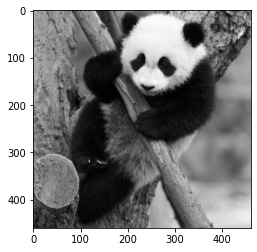

In [9]:
# load panda image and print shape and ndim
panda = load_panda()
print("panda.shape:", panda.shape)
print("panda.ndim:", panda.ndim)

# plot the panda!
plot_img(panda)

#### 1.4.1) Panda panda on the wall, you're the cutest of them all! (2 points)

Multiply `panda` by a matrix `flip` of the same size, of the form:

$$\begin{bmatrix}
    0 & \dots & 0 & 1\\
    0 & \dots & 1 & 0\\
    \vdots & \cdots & 0 & 0\\
    1 & \dots & 0 & 0\\
\end{bmatrix}
$$

which you can think of as a "mirror" of the identity matrix.

To perform the multiplication, you can either use the function you defined above or use an appropriate NumPy function.

In [10]:
flip =  np.identity(panda.shape[0])
flip = flip[::-1]
panda_mirror = np.matmul(panda, flip)

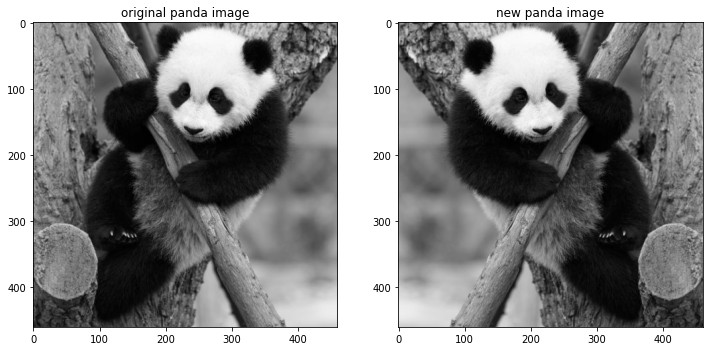

In [11]:
assert isinstance(panda, np.ndarray) and panda.shape == (460, 460) and panda.min() == 0 \
    and panda.max() == 255 and  _hash(panda[0, 10]) == '751b860653', \
    "OMG did you change the panda variable? Don't mess with the panda! Reload it with the code: panda = load_panda()"
assert panda_mirror.shape == panda.shape,  "The output matrix should be the same size as panda!"
assert panda_mirror.ndim == panda.ndim,  "The output array should be 2D, just like the panda one!"
assert _hash(panda_mirror[40, 50].astype(int)) != '5b4838043f' and (not isclose(panda_mirror.sum(), 49631)), \
    "Oops! Did you just multiply the matrices element-wise?"
assert flip[0, 0] != 1 and flip[60, 60] != 1, "You need to reverse the order of each row of the identity matrix!"
assert _hash(panda_mirror[40, 50].astype(int)) == '72a2dcfa6f' and _hash(panda_mirror[100, 120].astype(int)) == '2a6c4e0309', \
    "Wrong!"
plot_pandas(panda_mirror)

'AI = A, for any matrix A, where I is the identity (multiplication rules!)'

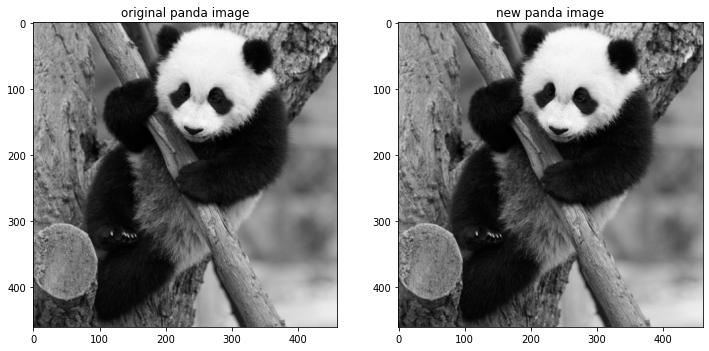

In [12]:
# remember that if we multiply a matrix by the identity we get the same matrix?
panda = load_panda()
panda_id = np.matmul(panda, np.identity(panda.shape[0]))
plot_pandas(panda_id)
print_id()

---

## 2 - The inverse

Let's use matrix multiplication, the inverse and NumPy, to create a text **encryption algorithm**, and then find a way to decrypt the encrypted messages!

You might need to brush up on concepts from SLU06 (`ord()` function), strings handling and functions.

### Exercise 2.1

**Encryption time! *Can you crack the code?***

Let's create a [Hill cipher](https://en.m.wikipedia.org/wiki/Hill_cipher), a cipher from classic cryptography that is based on matrices and their inverses.

We'll use a simple scheme to represent each letter in the alphabet by a number, as follows:

<img src="./media/hill_cipher_scheme.PNG" width="600"/>

Spaces in our message will correspond to the value `26`.

**Encryption steps**

1. Using the scheme, convert our text message (`message`) into a list of integers; 📌 *we'll start here*
2. Place the integers inside a matrix;
3. Multiply the matrix by a key matrix, `key_matrix`, which must be invertible;
4. Return the encrypted matrix.

The encryption step is simply about matrix multiplication:

$$\mathbf{A}\mathbf{K} = \mathbf{E}$$

where:

- $\mathbf{A}$ is an $n\times 2$ matrix representing the original message letters + spaces;
- $\mathbf{K}$ is a $2\times 2$ matrix representing the key matrix (which must be invertible);
- $\mathbf{E}$ is an $n\times 2$ matrix representing the encrypted matrix;

#### 2.1.1) Convert message into list of integers

First let's create a function to clean the message. Then we'll create a function to convert the clean message into a list of numbers.

**2.1.1-a) Create function `clean_message` (3 points)** 

This function:

- receives as input a string (the secret message);
- converts all letters to uppercase;
- removes all characters that are not in our defined set of `allowed_characters`;
- removes unnecessary extra whitespaces.

Use what you learned about string handling in SLU06 to help you!

In [13]:
# messages to experiment your message with
msg01 = "I heard ---5   kittens are   waiting      for a refill..."
msg02 = "Just a 2'?()/=/ bunch of ?#=r35242a*ªn32$?=dom characters."

# outputs expected after running clean_message
msg01_clean = "I HEARD KITTENS ARE WAITING FOR A REFILL"
msg02_clean = "JUST A BUNCH OF RANDOM CHARACTERS "

In [17]:
allowed_characters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ "

def clean_message(text_):
    
    ## convert to uppercase
    # text_ = ...
    
    ## remove characters not in allowed_characters using list comprehension
    # text_list_ = [char for char in text_ if ...]
    
    ## join the characters back together into one string
    # text_ = ...
    
    ## remove extra whitespaces (hint: use .join() and .split())
    # text_ = " ".join(text_.split())
    
    ## we'll add one extra whitespace at the end if the number list length is odd
    ## we need this to be able to build an Nx2 matrix on the next steps
    if len(text_) % 2 != 0:
        text_ += " "
    
    return text_

def clean_message(text_):
    text_ = text_.upper()
    text_list_ = [char for char in text_ if char in allowed_characters]
    text_ = "".join(text_list_)
    text_ = " ".join(text_.split())
    if len(text_) % 2 != 0:
        text_ += " "
    return text_


In [18]:
msg01 = "I heard ---5   kittens are   waiting      for a refill..."
msg02 = "Just a 2'?()/=/ bunch of ?#=r35242a*ªn32$?=dom characters."

assert clean_message(msg01) == "I HEARD KITTENS ARE WAITING FOR A REFILL", "Something's not right just yet."
assert clean_message(msg02) == "JUST A BUNCH OF RANDOM CHARACTERS ", "Something's not right just yet."

**2.1.1-b) (ungraded)**

Let's now create a function that converts a clean text message to a list of numbers, using our scheme.

We'll use `ord()`. Our function `get_numlist` will:

- receive a clean text message (output from `clean_message`);
- for each uppercase letter, we'll convert it to the correct number using `ord(letter) - 65`;
- for each whitespace, we'll simply assign it the number `26`;

I'll do this one for you, but make sure you understand how the function works.

In [19]:
def get_numlist(text_):
    
    # empty list to save numbers
    numlist_ = []
    
    # iterate through each character in the clean message
    for char in text_:
        if char == " ": # append 26, if it is a whitespace
            numlist_.append(26)
        else: # append 0-25 number to the corresponding to A-Z letter
            numlist_.append(ord(char) - 65)
    
    # return message as list of number
    return numlist_

# test it!
numbers_msg = get_numlist("I LOVE LINEAR ALGEBRA")
print("First five numbers in the message:", numbers_msg[:5])

First five numbers in the message: [8, 26, 11, 14, 21]


By now, you could actually start sending messages to your friends and family using `get_numlist()`, which they could read with `get_text()` below.

**Number to letter converter**

In [20]:
# read a number list into its original message
def get_text(numlist_):
    return "".join([chr(i + 65) if i != 26 else " " for i in numlist_])

# revert back to text message
print(get_text(numbers_msg))

I LOVE LINEAR ALGEBRA


In [21]:
secret_message = [12, 0, 19, 7, 4, 12, 0, 19, 8, 2, 18, 26, 8, 18, 26, 0, 22, 4, 18, 14, 12, 4]

**Encryption steps**

~1. Using the scheme, convert our text message (`message`) into a list of integers;~ ✔️ `clean_message()`, `get_numlist()`

2. Place the integers inside a matrix; 📌
3. Multiply the matrix by a key matrix, `key_matrix`, which must be invertible;
4. Return the encrypted matrix.

#### 2.1.2) Place the integers inside a matrix (2.5 points)

Let's create `cipher_matrix()`, which organizes our numbers list inside a matrix.

In [22]:
## create a function called cipher_matrix which reshapes a list into a 2D array
## with number of rows half the length of the list
## and number of columns = 2

def cipher_matrix(numberlist_):
    
    ## convert numberlist_ into 1D array
    num_array_ = np.array(numberlist_)
    
    ## reshape num_array to shape (len(numberlist_) // 2, 2)
    matrix_array_ = num_array_.reshape((len(numberlist_)//2, 2))
    
    return matrix_array_

In [23]:
clean_msg = clean_message("chocolates4   %$&/(%$)")
numlist = get_numlist(clean_msg)
assert np.array_equal(cipher_matrix(numlist), np.array([[ 2,  7], [14,  2], [14, 11], [ 0, 19], [ 4, 18]])), "Wrong! :("

**Encryption steps**

~1. Using the scheme, convert our text message (`message`) into a list of integers;~ ✔️ `clean_message()`, `get_numlist()`

~2. Place the integers inside a matrix;~ ✔️ `cipher_matrix()`

3. Multiply the matrix by a key matrix, `key_matrix`, which must be invertible; 📌
4. Return the encrypted matrix.

#### 2.1.3) Multiply by a key matrix (1.5  points)

Use `np.matmul()` to multiply a cipher matrix by a **key matrix**, which is an **invertible matrix**.

Create a function called `encrypt_matrix()` that:

- receives an $n\times 2$ cipher matrix and a $2\times 2$ key matrix (which should be invertible);
- checks if the key matrix is invertible (if not, the function returns `None`);
- multiplies the cipher matrix of size $n\times 2$ by an invertible key matrix of size $2\times 2$;
- returns the encrypted matrix.

In [24]:
# Example of a 2x2 key matrix (invertible)
key_matrix = np.array([[1, 0], [0, 2]])
print("key_matrix:\n", key_matrix, "\n")
print("inverse(key_matrix):\n", np.linalg.inv(key_matrix))

key_matrix:
 [[1 0]
 [0 2]] 

inverse(key_matrix):
 [[1.  0. ]
 [0.  0.5]]


In [25]:
## create a function called encrypt_matrix that multiplies a cipher matrix by the key matrix

def encrypt_matrix(cipher_, key_):
    try:
        np.linalg.inv(key_)
    except:
        return None
    return np.matmul(cipher_, key_)

In [26]:
key_2020 = np.array([[1, 0], [0, 2]])
matrix_2020 = np.array([[ 4, 21], [ 4, 17], [24, 19], [ 7,  8], [13,  6], [26,  8], [18, 26], [ 2,  0], [13,  2], [ 4, 11], [11,  4],[ 3, 26]])
secret_2020 = encrypt_matrix(matrix_2020, key_2020)
assert secret_2020[10, 1] == 8, "Something's wrong! :("

**Encryption steps**

~1. Using the scheme, convert our text message (`message`) into a list of integers;~ ✔️ `clean_message()`, `get_numlist()`

~2. Place the integers inside a matrix (`matrix`);~ ✔️ `cipher_matrix()`

~3. Multiply the matrix by a key matrix, `key_matrix`, which must be invertible;~ ✔️ `encrypt_matrix()`

4. Return the encrypted matrix. 📌

**2.1.4) Encryption - all in one function (ungraded)**

Let's finally create our encryption function, called `encrypt_message()`, using all the functions you've built!

- receives a message string and a key matrix;
- cleans the message and converts it to a cipher matrix;
- if the key is invertible, returns the **encrypted matrix**.

This encrypted matrix can be used by someone with the key matrix to decode the encrypted message.

In [27]:
def encrypt_message(message_, key_matrix_):
    
    ## clean message
    msg_ = clean_message(message_)
    
    ## convert message to list of numbers
    numlist_ = get_numlist(msg_)
    
    ## convert list of numbers to cipher matrix
    cipher_matrix_ = cipher_matrix(numlist_)
    
    ## encrypt cipher_matrix_
    encrypted_matrix_ = encrypt_matrix(cipher_matrix_, key_matrix_)
    
    return encrypted_matrix_

In [28]:
# 2 messages
msg01 = "I heard ---5   kittens are   waiting      for a refill..."
msg02 = "Just a 2'?()/=/ bunch of ?#=r35242a*ªn32$?=dom characters."

# the key
key_2020 = np.array([[1, 0], [0, 2]])

# clean and perform encryption
print("preview 2 encrypted messages:")
print(encrypt_message(msg01, key_2020)[:5])
print(encrypt_message(msg02, key_2020)[:5])

preview 2 encrypted messages:
[[ 8 52]
 [ 7  8]
 [ 0 34]
 [ 3 52]
 [10 16]]
[[ 9 40]
 [18 38]
 [26  0]
 [26  2]
 [20 26]]


### Exercise 2.2 (2.5 points)

**Decryption time!**

The person who will decrypt our matrix (and uncover the hidden message) will need to know the key matrix. With that, the only steps they need to perform are:
- use the **inverse** of the **key matrix** to undo the multiplication of the original message;
- use the scheme to convert the decrypted list of numbers to our original message.

To **decrypt** this matrix, we will use linear algebra again, namely the inverse and matrix multiplication properties!

We can multiply both sides of the encryption equation we described before by the inverse of the key matrix, $\mathbf{K}^{-1}$:

$$\mathbf{A}\mathbf{K}(\mathbf{K}^{-1}) = \mathbf{E}(\mathbf{K}^{-1})$$

According to the first property in section 1.2 of the learning notebook, we know that we can write the equation as:

$$\mathbf{A}(\mathbf{K}\mathbf{K}^{-1}) = \mathbf{E}\mathbf{K}^{-1}$$

And if you remember the definition of the inverse, you know we can rewrite this as:

$$\mathbf{A}(\mathbf{I_2}) = \mathbf{E}\mathbf{K}^{-1}$$

which basically gives us our original message matrix $\mathbf{A}$, because the identity  matrix does not change another matrix when multiplied by it:

$$\mathbf{A} = \mathbf{E}\mathbf{K}^{-1}$$

---

Let's do this!

Help me out below, by completing the function `decrypt_message()` according to the commented instructions!!

In [29]:
# run this cell first!

def get_text(numlist_):
    return "".join([chr(i + 65) if i != 26 else " " for i in numlist_])

In [32]:
def decrypt_message(encrypted_matrix_, key_matrix_):
    
    ## determine the inverse of the key_matrix_
    key_matrix_inv_ = np.linalg.inv(key_matrix_)
    
    ## determine the message matrix (matrix A in the cell above)
    original_matrix_ = np.matmul(encrypted_matrix_, key_matrix_inv_)
    
    ## convert to integer
    original_matrix_ = original_matrix_.astype(int)
    
    ## flatten original_matrix (check numpy documentation!!)
    original_matrix = original_matrix_.flatten()
    
    ## use function get_text() to convert the matrix into a message
    original_message_ = get_text(original_matrix_.flatten())
    
    return original_message_

In [33]:
key_matrix = np.array([[1, 0], [0, 2]])

# code matrices
code_msg_01 = np.genfromtxt("secret_message_1").astype(int)
code_msg_02 = np.genfromtxt("secret_message_2").astype(int)
code_msg_03 = np.genfromtxt("secret_message_3").astype(int)

# uncrack the messages using decrypt_message
decoded_msg_01 = decrypt_message(code_msg_01, key_matrix).lower()
decoded_msg_02 = decrypt_message(code_msg_02, key_matrix).lower()
decoded_msg_03 = decrypt_message(code_msg_03, key_matrix).lower()

# check your function


# print decoded messages in lower case, because we like to be polite
assert _hash(decoded_msg_01) == 'a745d3b5c3' and _hash(decoded_msg_02) == 'f0bc6bd35c' \
    and _hash(decoded_msg_03) == '834005ad63', "Wrong! Read the instructions and the commented steps carefully."

# decoded messages
print("Awesome!\n")
print(decoded_msg_01, "\n")
print(decoded_msg_02)
print(decoded_msg_03)

Awesome!

nothing is cooler than mathematics 

why do plants hate maths
because it gives them square roots


By the way, this is what would happen if you didn't know the key and throwed a random invertible key matrix into the decryption algorithm:

In [34]:
# this is what would happen if you used a WRONG KEY

# example for code_msg_01
print(decrypt_message(code_msg_01, np.array([[-1, 0], [2, 5]])))

@F4CCFOKGH)A?F:BDK4CKF1EPH>B5A5DMH


In [35]:
# What is happening in 2020?...
key_2020 = np.array([[1, 0], [0, 2]])
matrix_2020 = np.array([[ 4, 21], [ 4, 17], [24, 19], [ 7,  8], [13,  6], [26,  8], [18, 26], [ 2,  0], [13,  2], [ 4, 11], [11,  4],[ 3, 26]])
decrypt_message(encrypt_matrix(matrix_2020, key_2020), key_2020)

'EVERYTHING IS CANCELLED '

### Exercise 2.3 (ungraded)

Try to decrypt the following matrix! **When you do, go leave the message on Slack!!**

In [36]:
# Try to find the meaning behind the matrix below

hidden_message = np.array([[42, 25], [34, 21], [28, 38], [ 8, 17], [ 0, 26], [52, 45], [14, 26], [52, 30],
                           [ 6, 14], [36, 36], [52, 26], [34, 32], [30, 19], [ 4, 28], [40, 34], [36, 35],
                           [52, 30], [36, 26], [ 0, 26], [ 8, 26], [28, 32], [ 8, 16]])

key_matrix = np.array([[0, 1], [2, 1]])  # here's the key!

---

<center>Ooops! Our encryption algorithm was too simple... Our secret messages were found!!</center>

<img src="./media/mr_robot.gif" width="420">

---

## 3 - Additional NumPy methods

**Feature scaling**

Suppose you're a data scientist who wants to change the world (for better!) with data. You've been noticing there seems to be a lot of inequality in the pricing of medical insurance, and you want to prove it not with claims, but mathematics. Specifically, you want to understand whether some features such as a person's BMI, age, number of dependents or smoking habits affect the price charged by insurance companies.

You've decided that [you'll need to do some feature scaling](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e) first, and you opt for min-max scaling, to bring your features to a same range of values, $0$ to $1$.

$$\mathbf{x}_{scaled} = \frac{\mathbf{x} - \min(\mathbf{x})} {\max(\mathbf{x}) - \min(\mathbf{x})}$$

Let's do this for the BMI feature, using the NumPy methods you learned!

Although you know how to read files (remember SLU06!!), here we'll be a bit lazy and import our dataset using NumPy's [genfromtext](https://numpy.org/doc/1.20/user/basics.io.genfromtxt.html) function.

<img src="./media/insurance.jpg" width="520"/>

---
[Dataset source](https://www.kaggle.com/mirichoi0218/insurance/data).

### Exercise 3.1 (2 points)

Using the NumPy methods you learned, transform `bmi` to `bmi_scaled` using min-max scaling.

In [37]:
# read BMI column from our dataset into a numpy array
bmi = np.genfromtxt(os.path.join('data', 'insurance.csv'), skip_header=1, delimiter=',', usecols=2)

# check the length, shape and number of dimensions of our array
print("bmi length:", len(bmi))
print("bmi.ndim:", bmi.ndim)  # 1D array -> vector
print("bmi.shape:", bmi.shape)  # because our array is 1D, this equals the length of the array
print("preview first 5 BMI values:", bmi[:5])
print("check type:", bmi.dtype)  # should be float

bmi length: 1338
bmi.ndim: 1
bmi.shape: (1338,)
preview first 5 BMI values: [27.9   33.77  33.    22.705 28.88 ]
check type: float64


In [38]:
min_bmi = bmi.min()
max_bmi = bmi.max()
bmi_scaled = (bmi - min_bmi) / (max_bmi - min_bmi)

In [39]:
assert len(bmi_scaled) == len(bmi), "bmi and bmi_scaled should have the same length!"
assert not isclose(bmi_scaled[10], -15.766888763410503, abs_tol=1e-3), "Did you forget any parentheses? Remember precedence from SLU03!"
assert not isclose(bmi_scaled[10], 9.959604743083002, abs_tol=1e-3), "Did you forget any parentheses? Remember precedence from SLU03!"
assert not isclose(bmi_scaled[10], 25.790621468926552, abs_tol=1e-3), "Did you forget any parentheses? Remember precedence from SLU03!"
assert isclose(bmi_scaled[10], 0.2760290556900726, abs_tol=1e-3), "Check if you applied the formula correctly!"

### Exercise 3.2 (1 point)

*Just a sanity check...*

Check the minimum and maximum values of `bmi_scaled` using NumPy methods and assign them to `new_min` and `new_max`, respectively.

In [40]:
new_min = bmi_scaled.min()
new_max = bmi_scaled.max()

In [41]:
assert isclose(new_min, 0.0, abs_tol=0.1), "After min-max scaling, the minimum value should be 0 or very close to it!"
assert isclose(new_max, 1.0, abs_tol=0.1), "After min-max scaling, the maximum value should be 1 or very close to it!"

**Note:**

We could also have written our formula as a combination of linear vectors, as follows:

$$
\mathbf{x} =
\frac{1} {\max(\mathbf{x}) - \min(\mathbf{x})}
\begin{bmatrix}
    x_1 - \min(\mathbf{x})\\
    x_2 - \min(\mathbf{x})\\
    \vdots\\
    x_n - \min(\mathbf{x})
    \end{bmatrix} = 
\frac{1} {\max(\mathbf{x}) - \min(\mathbf{x})}
\begin{bmatrix}
    x_1\\
    x_2\\
    \vdots\\
    x_n
    \end{bmatrix} -
\frac{1} {\max(\mathbf{x}) - \min(\mathbf{x})}
\begin{bmatrix}
    \min(\mathbf{x})\\
    \min(\mathbf{x})\\
    \vdots\\
    \min(\mathbf{x})
    \end{bmatrix}
$$

---

<img src='./media/none.jpg' width='400'>

# Submit your work!

To submit your work, [follow the steps here, in the step "Grading the Exercise Notebook"!](https://github.com/LDSSA/ds-prep-course-2022#22---working-on-the-learning-units)

---

<center>That's it, you made it to the end!! Congratulations!!</center>

<img src="./media/the_end.gif" width="600">

---